In [19]:
import numpy as np
from numpy.random import seed

class AdalineSGD():
    def __init__(self, eta=0.01, n_iter=10, shuffle = True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        
        if random_state:
            seed(random_state)      
        
    def fit(self, X, y):
        self.w_ =np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X,y = self._shffle(X,y)
            
            cost = []
            for xi, target in zip(X,y):
                output = self.net_input(xi)
                error = target - output
                self.w_[1:] += self.eta * xi.dot(error)
                self.w_[0] += self.eta * error
                cost.append(0.5 * error**2)
            
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        
        return self
    
    def _shffle(self,X,y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def net_input(self, X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

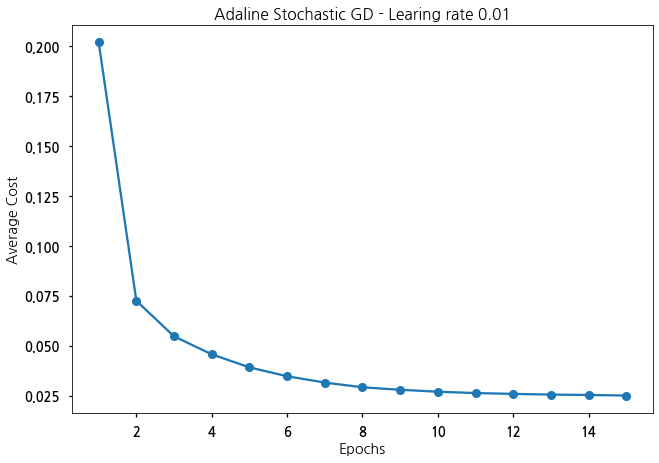

In [20]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn-talk')

krfont = {'family': 'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False


if __name__ =='__main__':
    df = pd.read_csv('C:\CodeTemp\iris.data',header=None)
    
    y = df.iloc[0:100, 4].values
    y = np.where(y=='Iris-setosa', -1,1)
    X = df.iloc[0:100, [0,2]].values
    
    X_std = np.copy(X)
    X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:, 0].std()
    X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:, 1].std()
    
    adal = AdalineSGD(eta=0.01, n_iter=15, random_state=1).fit(X_std, y)
    plt.plot(range(1, len(adal.cost_) + 1), adal.cost_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Average Cost')
    plt.title('Adaline Stochastic GD - Learing rate 0.01')
    
    plt.show()